Understand patterns like:

Most used words

Transcript length per comedian

Word cloud per comedian

Word frequency bar chart



In [1]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from collections import Counter


In [3]:
import pandas as pd

# Load cleaned data
df = pd.read_csv("cleaned_transcripts.csv")

# Convert stringified lists back to real Python lists (for tokens)
import ast
df['tokens'] = df['tokens'].apply(ast.literal_eval)


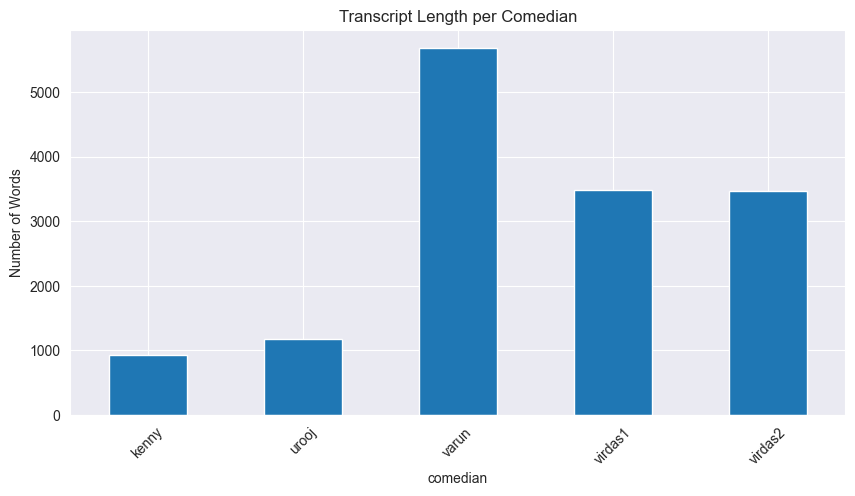

In [4]:
df['word_count'] = df['tokens'].apply(len)

# Plotting
df.plot(x='comedian', y='word_count', kind='bar', figsize=(10, 5), legend=False)
plt.ylabel("Number of Words")
plt.title("Transcript Length per Comedian")
plt.xticks(rotation=45)
plt.show()


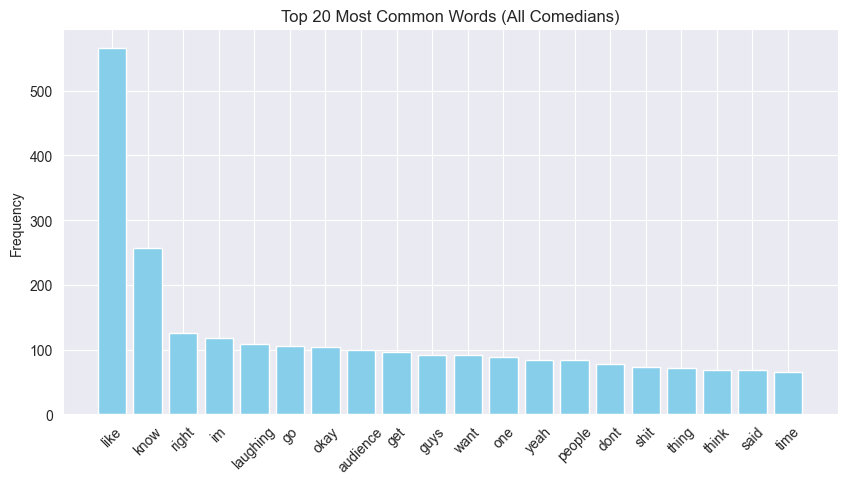

In [5]:

# Combine all tokens from all comedians
all_tokens = []
for token_list in df['tokens']:
    all_tokens.extend(token_list)

# Count top 20 most common words
top_words = Counter(all_tokens).most_common(20)

# Separate words and their counts for plotting
words, counts = zip(*top_words)

# Plot
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='skyblue')
plt.title("Top 20 Most Common Words (All Comedians)")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.show()


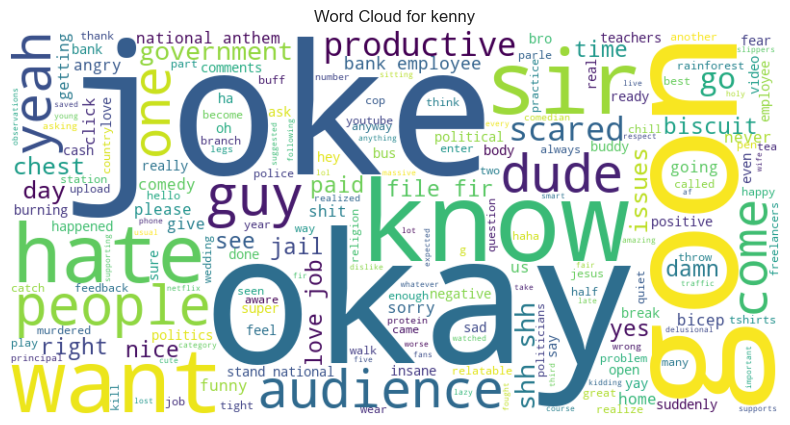

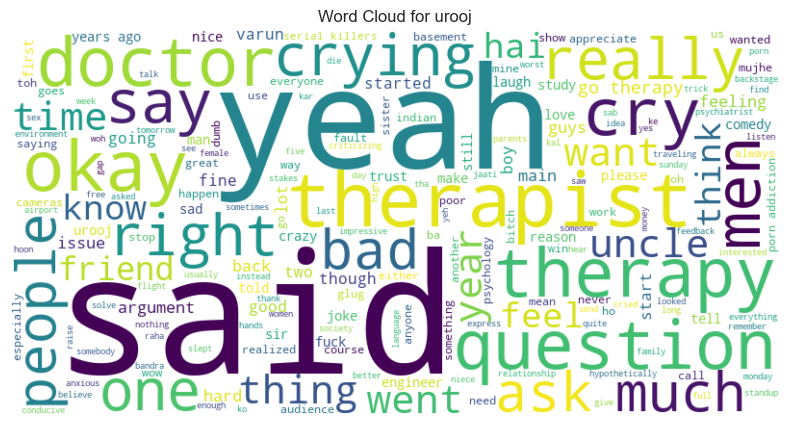

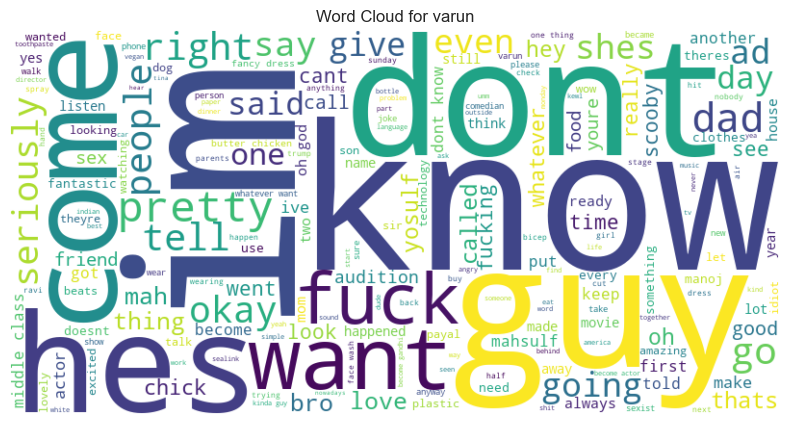

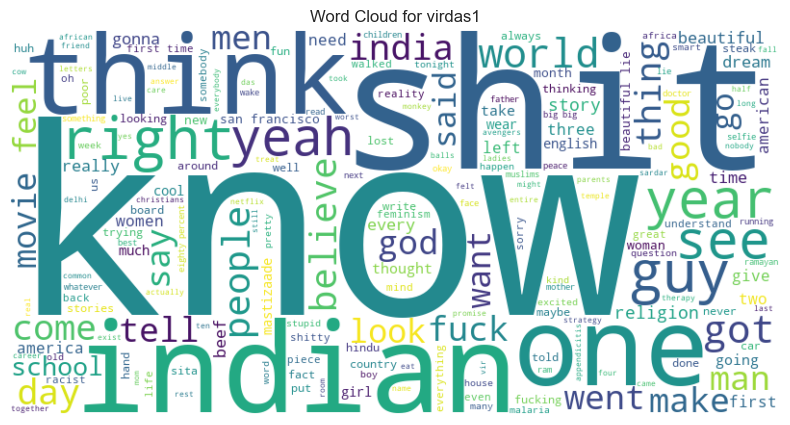

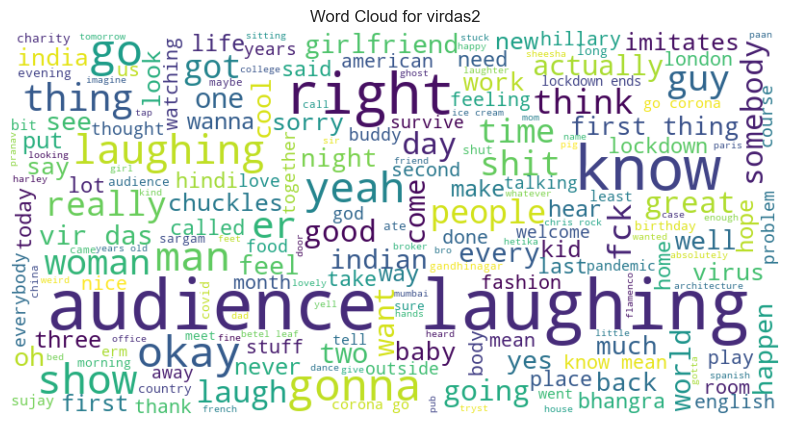

In [6]:


# Generate and display word cloud for each comedian
for comedian in df['comedian'].unique():
    # Combine all cleaned text for that comedian
    text = " ".join(df[df['comedian'] == comedian]['cleaned_text'])

    # Create word cloud
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {comedian}")
    plt.show()


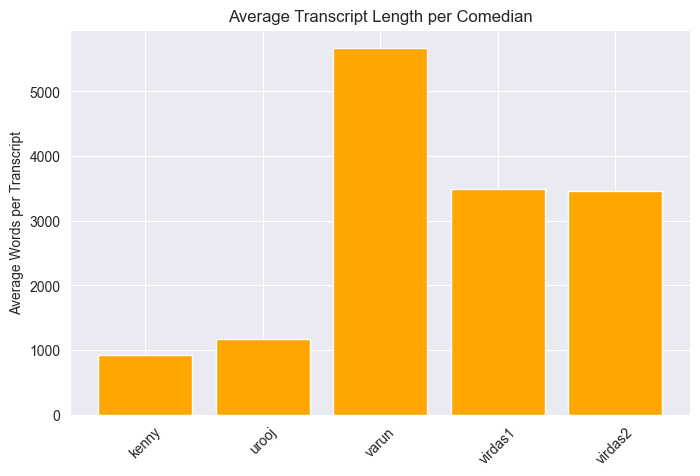

In [7]:
# Calculate average word count per comedian
avg_words = df.groupby('comedian')['word_count'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
plt.bar(avg_words['comedian'], avg_words['word_count'], color='orange')
plt.ylabel("Average Words per Transcript")
plt.title("Average Transcript Length per Comedian")
plt.xticks(rotation=45)
plt.show()


In [8]:
# Get unique words for each comedian
comedian_words = {}

for comedian in df['comedian'].unique():
    tokens = []
    for token_list in df[df['comedian'] == comedian]['tokens']:
        tokens.extend(token_list)
    comedian_words[comedian] = set(tokens)

# Find words unique to each comedian
for comedian in comedian_words:
    others = set().union(*(comedian_words[c] for c in comedian_words if c != comedian))
    unique_words = comedian_words[comedian] - others
    print(f"\nTop unique words used by {comedian}:\n", list(unique_words)[:15])



Top unique words used by kenny:
 ['respect', 'december', 'massive', 'freaking', 'employees', 'fans', 'restaurants', 'killed', 'wedding', 'buff', 'bourbon', 'saved', 'required', 'pen', 'comments']

Top unique words used by urooj:
 ['questions', 'glug', 'ewww', 'whispering', 'yeh', 'impressive', 'arguments', 'sawaal', 'feelings', 'sakti', 'attacks', 'borrow', 'lover', 'cry', 'underrepresented']

Top unique words used by varun:
 ['bras', 'salwar', 'period', 'lyricist', 'thursday', 'snapchat', 'scoobys', 'price', 'mosquitogoaway', 'lock', 'okayokay', 'monitor', 'jog', 'arabic', 'ash']

Top unique words used by virdas1:
 ['historically', 'thanos', 'struggle', 'asleep', 'curable', 'starting', 'pander', 'upset', 'bjp', 'weirdly', 'gear', 'interview', 'buzzfeed', 'packaged', 'adopt']

Top unique words used by virdas2:
 ['reaches', 'fck', 'dsouza', 'tharki', 'interact', 'sneak', 'expecting', 'throughout', 'september', 'surprised', 'guitar', 'shiflet', 'broker', 'sniffs', 'birth']
